# MNIST DATASET PROJECT

Sean Moylan
<br>
G00299424

## References
https://www.youtube.com/watch?v=wQ8BIBpya2k&t=1004s<br>
https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb<br>

***

To get started I downloaded the MNIST dataset from http://yann.lecun.com/exdb/mnist/
<br>
I first unziped the files into the /data directory to avoid using a library to extract from within this Notebook
<br>
The Nural network is going to be made up of the input layer, 2 hidden layers followed by an output layer using a sigmoid function to determine the data.

The MNIST dataset consists of training and testing images that are 28 X 28 pixels<br>


![alt text](neuralnetwork.png "Neural Network")

# Retrieving MNIST Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# I found a useful way to import the dataset straight from tensorflow as follows
mnistData = tf.keras.datasets.mnist;

## Unpack, view and Normalize the data

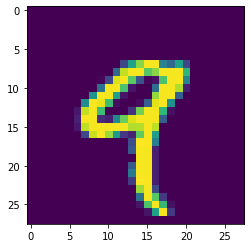

In [2]:
# Unpack the dataset, using this method of data retrieval we save on over complicating when reading it in
# This will give us 4 sets of data in bytes. x_train, y_train, x_test and y_test
(x_train, y_train), (x_test, y_test) = mnistData.load_data()

# To display an image we can use matplot to help
plt.imshow(x_train[4])
plt.show()

In [11]:
# Now we can normalise the data
# We do this so that all the values are between 0 and 1 instead of 0 and 255

y_train = tf.keras.utils.normalize(y_train, axis=1)
x_train = tf.keras.utils.normalize(x_train, axis=1)


## Building the model

In [12]:
model = tf.keras.models.Sequential()

In [13]:
# 1st Layer is the input layer
model.add(tf.keras.layers.Flatten())

# Rectified linear function is used as it is the default, can be changed later to test for better results
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Outputlayer will have the same amount of nurons as there are numbers for output so 10
# Softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [14]:
# Model does not optimize accurecy but instead tries to minimise the loss

# Adam optimizer with categorical crossentropy, I Found this to be more accurate
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Same but with Stochastic gradient descent optimizer
# model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])



In [15]:
# Here we sset the Epochs = 3 which means we pass the training set through the network 3 times
# This will give the model greater accuracy 
model.fit(x_train, y_train, epochs = 3)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 1 target samples.

In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3133805621401407 0.9244


In [9]:
model.save('Initial_Model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Initial_Model/assets


In [16]:
my_model = tf.keras.models.load_model('Initial_model')

In [17]:
# Make a Prediction based on the model
predictions = my_model.predict([x_test])

In [20]:
import numpy as np

print(np.argmax(predictions[15]))

5


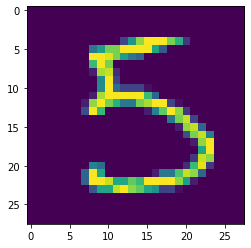

In [21]:
plt.imshow(x_test[15])
plt.show()